In [1]:
library(pacman)
p_load(lubridate, AUC, tidyverse,magrittr, dplyr, tidyr,rlist,dummy , e1071, ROSE , rotationForest, xgboost, Boruta, varSelRF)

also installing the dependency 'jsonlite'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
         binary source needs_compilation
jsonlite  1.7.2  1.8.0              TRUE

  Binaries will be installed
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jordy\AppData\Local\Temp\Rtmp0IP1P7\downloaded_packages



tidyverse installed
Warning message:
"package 'tidyverse' was built under R version 3.6.3"Warning message in p_load(lubridate, AUC, tidyverse, magrittr, dplyr, tidyr, rlist, :
"Failed to install/load:
tidyverse"

In [2]:
p_load(caret)

p_load(FNN)

p_load(randomForest)

options(repr.matrix.max.cols=1000, repr.matrix.max.rows=1000)

In [3]:
p_load(ranger)

In [4]:
p_load(ada)
p_load(remotes)

# Building basetable

In [5]:
table = (read.csv("Data//Hilly_races_final.csv", sep = ";"))
head(table)

table_train = table[table$Year<=2017,]

table_val = table[(table$Year>2017)&(table$Year<=2019) ,]

table_trainandval = table[table$Year<=2019,]

table_test = table[table$Year>2019,]

Pos,Rider,Team,Time,Rider_ID,Rider_Country,Team_ID,Year,Stage,UCI,ID,Stage.Type,Race,CONSTANT,Birthday,ACCELERATION,ATTACK,COBBLES,DOWNHILL,ENDURANCE,FLAT,HILL,MOUNTAIN,PROLOGUE,RECUP,RESISTANCE,SPRINT,OVERALL,Size,TT,Weight,fitness_i_handicap,fkIDcyclist_state,fkIDinjury,fkIDrace,fkIDstaff_physician,fkIDstaff_trainer,fkIDstate_roster,fkIDtga_skin,fkIDtraining_camp,fkIDtype_rider,gene_b_inshortlist,gene_b_nominated,gene_b_selected_in_roster,gene_b_will_retire,gene_f_popularity_max,gene_i_champion_bit,gene_i_date_last_breakaway,gene_i_date_last_punchers,gene_i_day_progression,gene_i_dossard,gene_i_year_progression,gene_ilist_fkIDfavorite_races,gene_sz_firstlastname,gene_sz_soundname,limit_i_acceleration,limit_i_baroudeur,limit_i_cobble,limit_i_downhilling,limit_i_endurance,limit_i_hill,limit_i_mountain,limit_i_plain,limit_i_prologue,limit_i_recuperation,limit_i_resistance,limit_i_sprint,limit_i_timetrial,prerace_i_cyclist,race_b_withdrawal,value_i_potentiel,value_i_rank_voted
194,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,4,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
171,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,6,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
186,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,8,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
117,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,10,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
151,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,11,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
129,yamamoto genki,Nippo - Vini Fantini,#VERW!,10662,JPN,6439,2016,13,NA,3583,Hilly,Giro,,19911119,54,62,51,51,56,64,63,57,65,61,59,52,58,0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Yamamoto G.,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [42]:
basetable_train = table_train %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                                                          
                                            ,overall_min = round(min(OVERALL))
                                             ,overall_max = round(max(OVERALL))
                                             ,overall_mean = round(mean(OVERALL))                             
                                                                          
                                            ,best_position = min(Pos))

basetable_val = table_val %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                            
                                            ,overall_min = round(min(OVERALL))
                                             ,overall_max = round(max(OVERALL))
                                             ,overall_mean = round(mean(OVERALL))    
                                    
                                            ,best_position = min(Pos))

basetable_test = table_test %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                                                        
                                            ,overall_min = round(min(OVERALL))
                                             ,overall_max = round(max(OVERALL))
                                             ,overall_mean = round(mean(OVERALL))    
                                    
                                            ,best_position = min(Pos))

basetable = table_trainandval %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                                                          
                                            ,overall_min = round(min(OVERALL))
                                             ,overall_max = round(max(OVERALL))
                                             ,overall_mean = round(mean(OVERALL))    
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [46]:
basetable_train = (basetable_train)%>% drop_na()
basetable_val = (basetable_val)%>% drop_na()
basetable_test = (basetable_test)%>% drop_na()
basetable = (basetable)%>% drop_na()

#Training set
basetable_train$Top10 = as.factor(ifelse(basetable_train$best_position <=10, 1,0))
basetable_train$Top5 = as.factor(ifelse(basetable_train$best_position <=5, 1,0))
basetable_train$Top4 = as.factor(ifelse(basetable_train$best_position <=4, 1,0))
basetable_train$Top3 = as.factor(ifelse(basetable_train$best_position <=3, 1,0))
basetable_train$Top2 = as.factor(ifelse(basetable_train$best_position <=2, 1,0))

table(basetable_train$Top3)

basetable_train$minutes_from_top = NULL
basetable_train$best_position = NULL
basetable_train$Team = NULL
basetable_train$Year = NULL
basetable_train$Stage = NULL
basetable_train$Team_ID = NULL
basetable_train$Race= NULL

#Validation set
basetable_val$Top10 = as.factor(ifelse(basetable_val$best_position <=10, 1,0))
basetable_val$Top5 = as.factor(ifelse(basetable_val$best_position <=5, 1,0))
basetable_val$Top4 = as.factor(ifelse(basetable_val$best_position <=4, 1,0))
basetable_val$Top3 = as.factor(ifelse(basetable_val$best_position <=3, 1,0))
basetable_val$Top2 = as.factor(ifelse(basetable_val$best_position <=2, 1,0))

table(basetable_val$Top3)


basetable_val$minutes_from_top = NULL
basetable_val$best_position = NULL
basetable_val$Team = NULL
basetable_val$Year = NULL
basetable_val$Stage = NULL
basetable_val$Team_ID = NULL
basetable_val$Race= NULL

#Test set
basetable_test$Top10 = as.factor(ifelse(basetable_test$best_position <=10, 1,0))
basetable_test$Top5 = as.factor(ifelse(basetable_test$best_position <=5, 1,0))
basetable_test$Top4 = as.factor(ifelse(basetable_test$best_position <=4, 1,0))
basetable_test$Top3 = as.factor(ifelse(basetable_test$best_position <=3, 1,0))
basetable_test$Top2 = as.factor(ifelse(basetable_test$best_position <=2, 1,0))

table(basetable_test$Top3)

basetable_test$minutes_from_top = NULL
basetable_test$best_position = NULL
basetable_test$Team = NULL
basetable_test$Year = NULL
basetable_test$Stage = NULL
basetable_test$Team_ID = NULL
basetable_test$Race= NULL

basetable$Top10 = as.factor(ifelse(basetable$best_position <=10, 1,0))
basetable$Top5 = as.factor(ifelse(basetable$best_position <=5, 1,0))
basetable$Top4 = as.factor(ifelse(basetable$best_position <=4, 1,0))
basetable$Top3 = as.factor(ifelse(basetable$best_position <=3, 1,0))
basetable$Top2 = as.factor(ifelse(basetable$best_position <=2, 1,0))

table(basetable$Top3)

basetable$minutes_from_top = NULL
basetable$best_position = NULL
basetable$Team = NULL
basetable$Year = NULL
basetable$Stage = NULL
basetable$Team_ID = NULL
basetable$Race= NULL

table_train <- basetable_train
table_test<- basetable_test
table_val <- basetable_val
table_trainval = basetable

# Feature Selection

## Variable selection: Boruta & varSelRF

In [59]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [60]:
head(table_train5)

flat_mean,mountain_mean,downhill_mean,cobbles_mean,tt_mean,prologue_mean,sprint_mean,acceleration_mean,endurance_mean,resistance_mean,recup_mean,hill_mean,attack_mean,flat_max,mountain_max,downhill_max,cobbles_max,tt_max,prologue_max,sprint_max,acceleration_max,endurance_max,resistance_max,recup_max,hill_max,attack_max,flat_min,mountain_min,downhill_min,cobbles_min,tt_min,prologue_min,sprint_min,acceleration_min,endurance_min,resistance_min,recup_min,hill_min,attack_min,overall_min,overall_max,overall_mean,Top5
67,68,67,57,62,64,64,68,67,67,67,68,68,71,78,78,61,68,69,75,74,72,74,75,75,73,64,58,61,54,58,61,56,61,63,64,63,65,61,63,71,66,1
66,70,67,55,64,64,64,69,67,69,68,70,70,70,79,70,68,68,70,75,75,69,74,72,74,80,64,60,63,51,60,60,56,60,64,64,62,65,63,62,69,66,1
68,70,65,57,67,67,62,68,68,69,69,71,69,74,78,70,68,76,76,72,76,74,76,76,78,72,63,62,62,52,58,61,56,63,65,64,63,67,62,64,72,67,1
70,67,67,61,66,68,63,69,69,69,67,70,72,80,75,81,81,77,79,79,77,77,76,78,75,78,65,59,63,53,58,59,56,62,66,64,62,64,64,64,76,68,1
65,63,64,55,60,61,64,66,65,65,64,67,68,72,75,71,59,63,65,76,77,70,72,71,73,73,63,56,60,53,58,58,58,61,62,61,60,62,63,61,67,64,1
65,68,66,55,61,62,59,64,66,66,66,68,69,69,76,69,57,67,68,63,70,72,73,73,74,82,62,56,62,53,57,58,55,61,62,61,59,62,62,62,69,64,1


In [61]:
#Variable selection: Boruta
rf_boruta <- Boruta(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, doTrace = 0, maxRuns = 500)

In [62]:
varsel_boruta <- names(rf_boruta$finalDecision[rf_boruta$finalDecision == "Confirmed"])


##Variable selection :varSelRF
rf_vsrf <- varSelRF(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, vars.drop.frac = 0.15,  ntree = 350, ntreeIterat = 100)
varsel_vsrf <- rf_vsrf$selected.vars

In [63]:
varsel_boruta

[1] "downhill_max"     "tt_max"           "acceleration_max" "endurance_max"   
[5] "attack_max"       "sprint_min"

In all models boruta variables perform better

# Prediction if finish in the top 5

In [64]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [65]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

In [66]:
ncol(train)

[1] 6

## Ranger

### Tuning

In [67]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  num_trees = c(1000),
  mtry       = seq(1, ncol(train), by = 1),
  node_size  = seq(1, 15, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [68]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = train, 
    y               = yTRAIN, 
    num.trees       = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  predictions =  predict(model,val)$predictions[,2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [69]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,num_trees,mtry,node_size,sampe_size,AUC
236,1000,3,11,0.75,0.7179430
237,1000,2,13,0.75,0.7179430
238,1000,1,1,0.75,0.7181675
239,1000,2,15,0.75,0.7188412
240,1000,1,3,0.75,0.7213115


### Validation

In [70]:
#No tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.7109814

In [75]:
#With tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 1, min.node.size = 3, sample.fraction = 0.750, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.7213115

In [76]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [77]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 30  9
         1 43 52

[1] "AUC:  0.721311475409836"

[1] "Accuracy:  0.611940298507463"

[1] "Recall:  0.852459016393443"

[1] "Precision:  0.547368421052632"

### Test

In [85]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [86]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [87]:
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 1, min.node.size = 3, sample.fraction = 0.750, probability = TRUE, seed = 123)
predictions =  predict(model,test)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.5583845

In [1046]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [1047]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 20  3
         1 29 21

[1] "AUC:  0.676020408163266"

[1] "Accuracy:  0.561643835616438"

[1] "Recall:  0.875"

[1] "Precision:  0.42"

In [1048]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 20  3
         1 29 21

[1] "AUC:  0.676020408163266"

[1] "Accuracy:  0.561643835616438"

[1] "Recall:  0.875"

[1] "Precision:  0.42"

In [1049]:
confusionMatrix(as.factor(res), as.factor(true_outcome), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20  3
         1 29 21
                                          
               Accuracy : 0.5616          
                 95% CI : (0.4405, 0.6776)
    No Information Rate : 0.6712          
    P-Value [Acc > NIR] : 0.9812          
                                          
                  Kappa : 0.2219          
                                          
 Mcnemar's Test P-Value : 9.897e-06       
                                          
            Sensitivity : 0.8750          
            Specificity : 0.4082          
         Pos Pred Value : 0.4200          
         Neg Pred Value : 0.8696          
             Prevalence : 0.3288          
         Detection Rate : 0.2877          
   Detection Prevalence : 0.6849          
      Balanced Accuracy : 0.6416          
                                          
       'Positive' Class : 1               
                                    

## Random Forest

In [1064]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top3
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top3
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [1065]:
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [1052]:
# hyperparameter grid search
hyper_grid <- expand.grid(
num_trees = c(1000),
  mtry       = seq(1, ncol(train), by = 1),
  node_size  = seq(1, 15, by = 3),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [1053]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  model <- randomForest(
    x               = train, 
    y               = yTRAIN, 
    ntree           = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    node_size       = hyper_grid$node_size[i],
    sample_frac     = hyper_grid$sampe_size[i]
  )
  predictions <- predict(model, val, type = "prob")[, 2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [1054]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,num_trees,mtry,node_size,sampe_size,AUC
121,1000,3,1,0.8,0.6629762
122,1000,3,4,0.8,0.6629762
123,1000,3,7,0.8,0.6629762
124,1000,3,10,0.8,0.6629762
125,1000,3,13,0.8,0.6629762


### Validation

In [1055]:
#No Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.6592857

In [1066]:
#Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=3)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.6629762

In [1067]:
auc = AUC::auc(roc(predictions,factor(yVAL)))

In [1068]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [1069]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 47 18
         1 37 32

[1] "AUC:  0.662976190476191"

[1] "Accuracy:  0.58955223880597"

[1] "Recall:  0.64"

[1] "Precision:  0.463768115942029"

### Test

In [1070]:
set.seed(123)
#Basetable is the combination of the validation and training set
train <- basetable
yTRAIN <- train$Top3
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top3
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [1071]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [1072]:
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=3)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.5799087

In [1073]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [1074]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 46 24
         1 27 21

[1] "AUC:  0.579908675799087"

[1] "Accuracy:  0.567796610169492"

[1] "Recall:  0.466666666666667"

[1] "Precision:  0.4375"

In [1075]:
confusionMatrix(as.factor(res), as.factor(true_outcome), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46 24
         1 27 21
                                          
               Accuracy : 0.5678          
                 95% CI : (0.4734, 0.6587)
    No Information Rate : 0.6186          
    P-Value [Acc > NIR] : 0.8904          
                                          
                  Kappa : 0.0956          
                                          
 Mcnemar's Test P-Value : 0.7794          
                                          
            Sensitivity : 0.4667          
            Specificity : 0.6301          
         Pos Pred Value : 0.4375          
         Neg Pred Value : 0.6571          
             Prevalence : 0.3814          
         Detection Rate : 0.1780          
   Detection Prevalence : 0.4068          
      Balanced Accuracy : 0.5484          
                                          
       'Positive' Class : 1               
                                    

## XGBoost

In [1076]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top5 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top5 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top5 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top5 <- NULL
table_trainval5$Top2 <- NULL

In [1077]:
#new train en val set
y_train <- table_train5$Top3
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top3
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top3
test <- table_test
table_test5$Top5 <- NULL

#Combining test and validationset together
y_trainval <- table_trainval5$Top3
trainval <- table_trainval5
trainval$Top3<- NULL

In [1078]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

In [1079]:
head(train_fs,n = 2)

downhill_mean,sprint_mean,sprint_max,acceleration_max,attack_max
67,64,75,74,73
67,64,75,75,80


In [1080]:
head(val_fs,n = 2)

downhill_mean,sprint_mean,sprint_max,acceleration_max,attack_max
73,65,73,78,75
67,67,75,76,76


In [1081]:
head(test_fs,n = 2)

downhill_mean,sprint_mean,sprint_max,acceleration_max,attack_max
70,65,74,77,77
67,66,72,74,78


In [1082]:
head(trainval_fs,n = 2)

downhill_mean,sprint_mean,sprint_max,acceleration_max,attack_max
67,64,75,74,73
67,64,75,75,80


### Tuning

In [1083]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
trainvalxgb = trainval_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

In [1084]:
dtrain <- xgb.DMatrix(data = as.matrix(trainxgb), label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))
dtrainval = xgb.DMatrix(data = as.matrix(trainvalxgb), label = as.numeric(as.character(y_trainval))) 

[1]	train-auc:0.824216	test-auc:0.602381 
[2]	train-auc:0.881103	test-auc:0.691667 
[3]	train-auc:0.886729	test-auc:0.705595 
[4]	train-auc:0.889768	test-auc:0.703571 
[5]	train-auc:0.890170	test-auc:0.702857 
[6]	train-auc:0.896901	test-auc:0.702976 
[7]	train-auc:0.899010	test-auc:0.694643 
[8]	train-auc:0.903983	test-auc:0.694643 
[9]	train-auc:0.905038	test-auc:0.697738 
[10]	train-auc:0.919053	test-auc:0.689762 
[11]	train-auc:0.924377	test-auc:0.690595 
[12]	train-auc:0.929953	test-auc:0.682619 
[13]	train-auc:0.936207	test-auc:0.672976 
[14]	train-auc:0.940803	test-auc:0.674881 
[15]	train-auc:0.946228	test-auc:0.668452 
[16]	train-auc:0.947634	test-auc:0.677262 
[17]	train-auc:0.948614	test-auc:0.672976 
[18]	train-auc:0.950623	test-auc:0.673214 
[19]	train-auc:0.953260	test-auc:0.672024 
[20]	train-auc:0.955269	test-auc:0.669405 


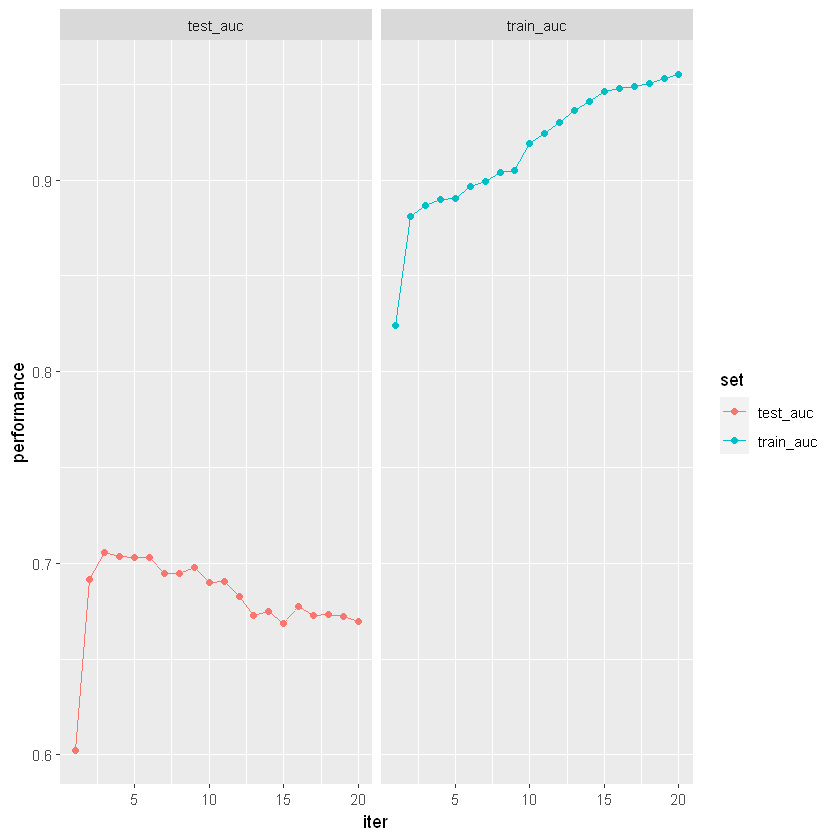

In [1085]:
#plotting learning curve of the number of iterations
#Need to have watchlist and verbose turned on
watchlist <- list(train=dtrain, test=dval)
set.seed(123)
xgbModel_opt <- xgb.train(
    data = dtrain, 
    nrounds = 20,
    eta= 0.1,
    objective = "binary:logistic", 
    verbose = 2, 
    watchlist = watchlist,
    eval_metric = 'auc',
)

history <- xgbModel_opt$evaluation_log

history %>% pivot_longer(2:3, names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point()+ geom_line()+
  facet_wrap(~set)

### Validation

In [1086]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrain, 
    nrounds       = opt_iter, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

predxgb <- predict(xgbModel_opt,dval)
auc <-AUC::auc(roc(predxgb,y_val))
AUC::auc(roc(predxgb,y_val))

[1] 0.7055952

In [1087]:
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_val

confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 60 23
         1 24 27

[1] "AUC:  0.705595238095238"

[1] "Accuracy:  0.649253731343284"

[1] "Recall:  0.54"

[1] "Precision:  0.529411764705882"

### Test

In [1088]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrainval, 
    nrounds       = 15, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

In [1089]:
#Although a lower AUC the recall and precision i significantly better than both ranger and random forest
set.seed(123)
predxgb <- predict(xgbModel_opt,dtest)
auc <-AUC::auc(roc(predxgb,y_test))
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 49 28
         1 24 17

[1] "AUC:  0.587366818873668"

[1] "Accuracy:  0.559322033898305"

[1] "Recall:  0.377777777777778"

[1] "Precision:  0.414634146341463"

In [1090]:
confusionMatrix(as.factor(res), as.factor(true_outcome), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 49 28
         1 24 17
                                         
               Accuracy : 0.5593         
                 95% CI : (0.465, 0.6506)
    No Information Rate : 0.6186         
    P-Value [Acc > NIR] : 0.9215         
                                         
                  Kappa : 0.0499         
                                         
 Mcnemar's Test P-Value : 0.6774         
                                         
            Sensitivity : 0.3778         
            Specificity : 0.6712         
         Pos Pred Value : 0.4146         
         Neg Pred Value : 0.6364         
             Prevalence : 0.3814         
         Detection Rate : 0.1441         
   Detection Prevalence : 0.3475         
      Balanced Accuracy : 0.5245         
                                         
       'Positive' Class : 1              
                                         

## LightGBM

In [34]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top3 <- NULL
table_trainval5$Top2 <- NULL

In [35]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL

#Combining test and validationset together
y_trainval <- table_trainval5$Top5
trainval <- table_trainval5
trainval$Top5<- NULL

In [36]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

### Tuning

In [ ]:
leaves <- c(2, 4, 6, 8)
nround <- c(2, 5, 10, 20, 50, 100, 200)
learning_rate <- c(0.01, 0.05, 0.1, 0.2, 0.5)

# create data frame of all possible combinations
params <- expand.grid(leaves, nround, learning_rate)
colnames(params) <- c("leaves", "nround", "learning_rate")

aucs <- vector()
for (row in 1:nrow(params)) {
  # set parameters
  par <- params[row, ]
  param_set <- list(num_leaves = par[, "leaves"],
                    learning_rate = par[,"learning_rate"],
                    objective = "binary", boosting = "gbdt",
                    num_iterations = par[, "nround"])
  # model
  lgbm_model <- lightgbm(data = as.matrix(train_fs),
                         params = param_set, label = as.numeric(as.character(y_train)),
                         verbose = -1)

  # predict
  pred <- predict(lgbm_model, as.matrix(val_fs))
  
  # evaluate
  aucs[row] <- AUC::auc(AUC::roc(pred, y_val))
}

In [ ]:
(optimal_paramsLGBM <- params[which.max(aucs), ])

### Build optimal model

In [ ]:
# Build the final model on the optimal parameters
final_param_set <- list(num_leaves = optimal_paramsLGBM[, "leaves"],
                        learning_rate = optimal_paramsLGBM[, "learning_rate"], objective = "binary",
                        boosting = "gbdt", num_iterations = optimal_paramsLGBM[,
                                                                               "nround"])

lgbm_model <- lightgbm(data = as.matrix(train_fs), params = final_param_set,
                       label = as.numeric(as.character(y_train)), verbose = -1)

### Validation

In [ ]:
# Predict
predlgbm <- predict(lgbm_model, as.matrix(val_fs))
# Evaluate
AUC::auc(AUC::roc(predlgbm, y_val))

### Test

In [ ]:
predlgbm <- predict(lgbm_model, as.matrix(test_fs))
auc <-AUC::auc(AUC::roc(predlgbm, y_test))

In [ ]:
res <-ifelse(predlgbm>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)



# Rotation forest


In [6]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top3
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top3
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

ERROR: Error in eval(expr, envir, enclos): object 'basetable_train' not found


In [33]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [34]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  L       = seq(1, 20, by = 1),
  K       = seq(1, floor(ncol(train)/2), by = 1)
)

In [35]:
ncol(train)

[1] 5

In [36]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  RoFmodel <- rotationForest(
    x               = train, 
    y               = yTRAIN, 
    L               = hyper_grid$L[i],
    K               = hyper_grid$K[i],
  )
  predictions =  predict(RoFmodel, val)
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [37]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,L,K,AUC
36,8,2,0.6852381
37,7,2,0.6852381
38,12,2,0.6863095
39,14,2,0.6872619
40,13,2,0.6894048


### Validation

In [ ]:
#No tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN)
predictions =  predict(RoFmodel,val)
AUC::auc(roc(predictions,factor(yVAL)))

In [ ]:
#With tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN, L=15, K=3)
predictions =  predict(RoFmodel, val)
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

### Test

In [ ]:
set.seed(123)
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [ ]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [ ]:
set.seed(123)
model <- rotationForest(x=train, y = yTRAIN, L=15, K=3)
predictions =  predict(model,test)
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome), positive = "1")

# Catboost

In [159]:
train_pool <- catboost.load_pool(data = data.matrix(basetable_train[,-(40:44)]),label = as.numeric(as.character(basetable_train$Top5)))
val_pool <- catboost.load_pool(data = data.matrix(basetable_val[,-(40:44)]), label = as.numeric(as.character(basetable_val$Top5)))

ERROR: Error in catboost.load_pool(data = data.matrix(basetable_train[, -(40:44)]), : could not find function "catboost.load_pool"


In [ ]:
# parameter tuning with caret
fit_control <- trainControl(method = "cv",
                            number = 4,
                            classProbs = TRUE)

grid <- expand.grid(depth = c(4, 6, 8),
                    learning_rate = c(0.1,0.5,1),
                    iterations = 100,
                    l2_leaf_reg = c(0.001, 0.01, 0.1, 1),
                    rsm = 0.95,
                    border_count = 64)
report <- train(basetable_train[,-(40:44)], as.factor(make.names(basetable_train$Top5)),
                method = catboost.caret,
                logging_level = 'Verbose', preProc = NULL,
                tuneGrid = grid, trControl = fit_control)

print(report)
#extract best parameters
params <- list(loss_function = 'Logloss',
               iterations = 100, 
               depth = 8, 
               learning_rate = 0.1,
               l2_leaf_reg = 0.001, #L2 regularization 
               metric_period=10)

importance <- varImp(report, scale = FALSE)
print(importance)

In [ ]:
# train model
catboost_train <- catboost.train(train_pool,  NULL, params = params)

preds_cad_train <- catboost.predict(catboost_train, val_pool)

AUC::auc(AUC::roc(preds_cad_train,basetable_val$Top5)) # Validation set AUC

In [ ]:
# now for test set
big_pool <- catboost.load_pool(data = data.matrix(basetable[,-(40:44)]), 
                                 label = as.numeric(as.character(basetable$Top5)))
test_pool <- catboost.load_pool(data = data.matrix(basetable_test[,-(40:44)]), 
                               label = as.numeric(as.character(basetable_test$Top5)))

catboost_test <- catboost.train(big_pool,  NULL, params = params)

preds_cad_test <- catboost.predict(catboost_test, test_pool)

AUC::auc(AUC::roc(preds_cad_test,basetable_test$Top5)) # Test set AUC

In [ ]:
# check accuracy
res <-ifelse(preds_cad_test>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy

# Heterogenous ensemble

In [ ]:

# adaboost & rotation
finalpredictions <- (auc_RoF/(auc_RoF + auc_ada)) * pred_RoF_test + (auc_ada/(auc_RoF + auc_ada)) * predAB

AUC::auc(AUC::roc(finalpredictions, basetable_test$Top5))

# accuracy
res <-ifelse(finalpredictions>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy
